In [1]:
install.packages("getPass")
install.packages("googlesheets4")
installed.packages('googledrive')
install.packages("ISLR")

library('googlesheets4')
library('googledrive')
library('getPass')
library ('MASS') ### to be able to use examples from ISLR book
library ('ISLR') ### to be able to use examples from ISLR book

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘gargle’, ‘googledrive’, ‘rematch2’



Package,LibPath,Version,Priority,Depends,Imports,LinkingTo,Suggests,Enhances,License,License_is_FOSS,License_restricts_use,OS_type,Archs,MD5sum,NeedsCompilation,Built


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Attaching package: ‘googledrive’

The following objects are masked from ‘package:googlesheets4’:

    request_generate, request_make


Attaching package: ‘getPass’

The following object is masked from ‘jupyter:irkernel’:

    getPass



In [22]:
install.packages("lme4")
library (lme4)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependency ‘RcppEigen’

Loading required package: Matrix

Attaching package: ‘Matrix’

The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



In [2]:
library(tidyverse)
options(repr.plot.width=4, repr.plot.height=4)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ dplyr::select() masks MASS::select()


In [3]:
### perhaps the most difficult part here is to setup appropriately communication with google services

### SOMETIMES THE CONNECTION FAILS, SO TRY SEVERAL TIMES!!!

### the best option so far is:
### (1) go to https://console.cloud.google.com/
### (2) create your own "Google Service Account Key" there and download the file into your computer
### (3) create private repo on GitHub
### (4) upload the file into this repo
### (5) authorize your GitHub account
github_login = "kasev" 
### (6) specify name of the Repo containing your Google Service Account Key file
repo_name = "Rcolab" 
### (7) interactively setup your password
github_cloner <- paste("git clone https://", github_login, ":", getPass(), "@github.com/", github_login, "/", repo_name, ".git", sep="")
system(github_cloner)
### (8) make the authorization
drive_auth(path= "/content/Rcolab/service_account_key.json")
sheets_auth(token = drive_token())
### (8) setup your GDrive working directory (comment if you do not want it)
drive_get("~/a-PROJECTS/R_materials/Rcolab")

··········


name,path,id,drive_resource
<chr>,<chr>,<chr>,<list>


# Import the data

In [4]:
### URL of your spreadsheet
sheet_url = "https://docs.google.com/spreadsheets/d/1aRNUQeci2aWApkXk69OI_9YINL8YXXnornKkVi0LZeE/edit?usp=sharing"
### choose sheet as your dataframe
df_gods = read_sheet(sheet_url, "results20191119")

Reading from 'moralizing-religions-in-AM_results'
Range "'results20191119'"


In [5]:
### inspect first few rows in our data
head(df_gods)

author,work,id,provenience,century,orig_length,lemmata_length,nouns_adj_length,sentence_data,kcal,⋯,conc_theos_5_terms,conc_theos_7_terms,conc_theos_9_terms,conc_zeus_7_terms,sent_theos_terms,theos_5_moral_load,theos_7_moral_load,theos_9_moral_load,zeus_7_moral_load,theos_sent_moral_load
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Lucianus Samosatenus,De saltatione,tlg0062.tlg045.1st1K-grc1,pagan,1.5,8031,3497,2297,"[207, 16.8937198068, 80, 10.8087596065]",30500,⋯,"['εὐγενής', 'καλός']","['εὐγενής', 'καλός']","['εὐγενής', 'καλός']",['ἀμύμων'],"['εὐγενής', 'ὄνομα', 'καλός']",0.67149825,0.59837794,0.54649825,0.5725716,0.59884462
Lucianus Samosatenus,Deorum concilium,tlg0062.tlg050.1st1K-grc1,pagan,1.5,2166,912,557,"[63, 14.4761904762, 84, 15.7155843619]",30500,⋯,"['ἄξιος', 'ὄνομα']","['ἄξιος', 'ὄνομα']","['ἄξιος', 'ὄνομα']","['ἀρετή', 'ὄνομα']","['ἄξιος', 'τρόπος', 'χρή', 'ὄνομα']",0.25446902,0.21457685,0.18588993,0.1438355,0.21227165
Plutarch,Theseus,tlg0007.tlg001.perseus-grc2,pagan,1.5,8306,4028,2412,"[249, 16.1767068273, 70, 10.2169685024]",30500,⋯,[],[],['ἀρετή'],[],['ἀρετή'],0.00000000,0.00000000,0.15607976,0.0000000,0.10274798
Tatianus,Oratio ad Graecos,tlg1766.tlg001.perseus-grc1,christian,1.5,11760,5215,3357,"[384, 13.5807291667, 73, 9.4239689693]",30500,⋯,"['γνῶσις', 'φαῦλος', 'ἀγαθός', 'τρόπος', 'καλός']","['γνῶσις', 'δίκαιος', 'φαῦλος', 'ἀγαθός', 'ὄνομα', 'καλός', 'τρόπος']","['γνῶσις', 'φαῦλος', 'δίκαιος', 'ἀγαθός', 'φαῦλος', 'ὄνομα', 'καλός', 'τρόπος']",['εὐεργεσία'],"['γνῶσις', 'φαῦλος', 'φαῦλος', 'ἀγαθός', 'δίκαιος', 'καλός', 'ὄνομα', 'τρόπος', 'χρή']",0.05455088,0.05573015,0.05427093,0.4175042,0.05054668
Plutarch,Camillus,tlg0007.tlg011.perseus-grc2,pagan,1.5,12153,5924,3597,"[276, 21.4637681159, 71, 14.0220630603]",30500,⋯,"['ἀρετή', 'καλός']","['ἀρετή', 'ἄξιος', 'καλός']","['ἀρετή', 'ἄξιος', 'καλός']",[],"['δίκαιος', 'δικαιοσύνη', 'ἀγαθός', 'ἀρετή', 'ἄξιος', 'καλός']",0.12360368,0.12065860,0.10583583,0.0000000,0.14070958
Polyaenus,Excerpta Polyaeni,tlg0616.tlg002.1st1K-grc1,pagan,1.5,18993,9393,5330,"[961, 9.7741935484, 106, 8.3016741664]",30500,⋯,[],[],[],[],[],0.00000000,0.00000000,0.00000000,0.0000000,0.00000000


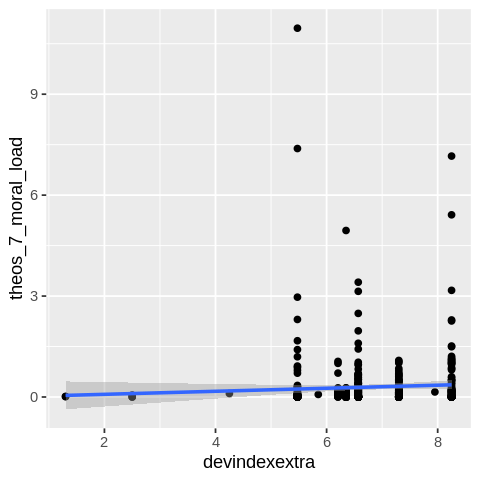

In [6]:
ggplot(df_gods[df_gods$theos_count>0,], aes(x=devindexextra, y=theos_7_moral_load)) + geom_point() + geom_smooth(method=lm)

# Linear Regression Models

Here we search for a model with the best predictive power, i.e. with maximum $R^2$, having general form of:

$Y = {\beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_p X_p + \epsilon }$,

where *p* means the number of predictors. 


In [0]:
df_gods_theos = df_gods[df_gods$theos_count > 0,]
df_gods_theos_bc = df_gods_theos[df_gods_theos$century < 0,]

In [56]:
### let's start with the simplest one
### MORAL LOAD x (DEVINDEX /THEOS_COUNT)
#Y = log(theos_7_moral_load/theos_count)
simple_model=lm(theos_7_moral_load~devindex+century, data=df_gods_theos)
summary(simple_model)


Call:
lm(formula = theos_7_moral_load ~ devindex * century, data = df_gods_theos)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.5036 -0.4511 -0.1773 -0.0019  6.6571 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)
(Intercept)      -1.93349    2.32814  -0.830    0.408
devindex          0.31532    0.23062   1.367    0.174
century          -0.26156    0.33509  -0.781    0.436
devindex:century  0.03739    0.04060   0.921    0.359

Residual standard error: 0.9343 on 141 degrees of freedom
  (343 observations deleted due to missingness)
Multiple R-squared:  0.035,	Adjusted R-squared:  0.01447 
F-statistic: 1.705 on 3 and 141 DF,  p-value: 0.1688


In [50]:
install.packages("glmulti")
library(glmulti)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependency ‘rJava’

Warning message in install.packages("glmulti"):
“installation of package ‘rJava’ had non-zero exit status”Warning message in install.packages("glmulti"):
“installation of package ‘glmulti’ had non-zero exit status”

ERROR: ignored

In [46]:
### let's start with the simplest one
### MORAL LOAD x AFFLPROG
full_model = lmer(theos_7_moral_load~devindex+(1|author), data=df_gods_theos)
summary(full_model)

Linear mixed model fit by REML ['lmerMod']
Formula: theos_7_moral_load ~ devindex + (1 | author)
   Data: df_gods_theos

REML criterion at convergence: 394.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.7568 -0.3841 -0.2272 -0.0153  7.1716 

Random effects:
 Groups   Name        Variance Std.Dev.
 author   (Intercept) 0.03113  0.1764  
 Residual             0.83565  0.9141  
Number of obs: 145, groups:  author, 27

Fixed effects:
            Estimate Std. Error t value
(Intercept) -0.45999    0.44538  -1.033
devindex     0.11271    0.06054   1.862

Correlation of Fixed Effects:
         (Intr)
devindex -0.980

In [51]:
Anova(full_model,type='II')

ERROR: ignored

In [18]:
### let's start with the simplest one
### MORAL LOAD x AFFLPROG
lm.fit1=lm(theos_sent_moral_load~AfflProg+devindex+lemmata_length, data=df_gods_theos_bc)
summary(lm.fit1)


Call:
lm(formula = theos_sent_moral_load ~ AfflProg + devindex + lemmata_length, 
    data = df_gods_theos_bc)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.7349 -0.5274 -0.3527  0.0477  6.8766 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)
(Intercept)     1.839e-01  7.936e-01   0.232    0.817
AfflProg       -1.812e-01  3.867e-01  -0.469    0.640
devindex        1.329e-01  1.114e-01   1.192    0.235
lemmata_length -7.677e-06  7.593e-06  -1.011    0.314

Residual standard error: 1.225 on 139 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.02393,	Adjusted R-squared:  0.002866 
F-statistic: 1.136 on 3 and 139 DF,  p-value: 0.3368


In [0]:
lm.fit2=lm

In [11]:
anova(lm.fit1, lm.fit2)

ERROR: ignored

Such a model can easily include non-linear transformations of the predictors (see Gareth et al. 2015, p. 115-116). 

Here we can simply start with natural logaritm of population estimate:

$Y = {\beta_0 + \beta_1 X_1 + \beta_2 \log_2(X_1)  + \epsilon }$,

where
* $X_1$ is the population estimate
* $\log_2(X_1)$ is the natural logarithm of the population estimates
* $\beta_n$ is coefficient assiciated with each of the predictor N 


In [0]:
### CHRIST x (POPEST + log_2(POPEST)
lm.fit=lm(christ~popest+I(log(popest, 2)), data=df_sites_filled)
summary(lm.fit)


Call:
lm(formula = christ ~ popest + I(log(popest, 2)), data = df_sites_filled)

Residuals:
    Min      1Q  Median      3Q     Max 
-173.81  -36.50   30.19   47.27  115.28 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        4.803e+02  6.634e+01   7.241 5.22e-12 ***
popest            -5.960e-05  8.421e-05  -0.708  0.47973    
I(log(popest, 2)) -1.678e+01  5.091e+00  -3.297  0.00112 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 74.13 on 256 degrees of freedom
Multiple R-squared:  0.09244,	Adjusted R-squared:  0.08535 
F-statistic: 13.04 on 2 and 256 DF,  p-value: 4.055e-06


In [0]:
### CHRIST x (POPEST + log_2(POPEST) + JERU_COST + JERU_COST^2) 

lm.fit=lm(christ~jeru_cost+I(jeru_cost^2)+popest+I(log(popest, 2)), data=df_sites_filled)
summary(lm.fit)


Call:
lm(formula = christ ~ jeru_cost + I(jeru_cost^2) + popest + I(log(popest, 
    2)), data = df_sites_filled)

Residuals:
    Min      1Q  Median      3Q     Max 
-187.58  -36.00   17.29   43.34  137.78 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        3.203e+02  6.689e+01   4.789 2.85e-06 ***
jeru_cost          5.200e+00  1.175e+00   4.424 1.44e-05 ***
I(jeru_cost^2)    -6.144e-02  2.283e-02  -2.691   0.0076 ** 
popest            -1.060e-04  7.890e-05  -1.343   0.1804    
I(log(popest, 2)) -1.010e+01  4.872e+00  -2.074   0.0391 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 69.15 on 254 degrees of freedom
Multiple R-squared:  0.2163,	Adjusted R-squared:  0.204 
F-statistic: 17.53 on 4 and 254 DF,  p-value: 1.022e-12


So this way we are able to get from $R^2=0.1384$ and $R^2=0.05391$ for **jeru_cost** and **popest** as single predictors applied independently, to  $R^2=0.2163$ combining natural logaritm of **popest** and squared **jeru_cost**. The form of the model is as follows:

$Y = {\beta_0 + \beta_1 X_1 + \beta_2 \log_2(X_1) +  \beta_3 X_2 + \beta_4 X_2^2 + \epsilon }$.

Remember that ommiting the linear predictors means much worse performance of the model.




# Cultural Factors